In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.layers import LSTM
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

# zero_padding_array = np.zeros((500,100,600,1))

In [5]:
training_data.shape

(500, 100, 1000)

In [6]:
training_labels.shape

(500, 5050)

In [7]:
#training_labels_padding_zero = np.zeros(training_data.shape)

In [8]:
#training_labels_padding_zero[:training_labels.shape[0], :training_labels.shape[1], :training_labels.shape[2]] = training_labels

In [9]:
#training_labels_padding_zero.shape

In [10]:
#training_labels = training_labels_padding_zero

In [11]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)
print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)

(500, 100, 1000)
(500, 5050)
X_train.shape :  (425, 100, 1000)
X_test.shape :  (75, 100, 1000)
Y_train.shape :  (425, 5050)
Y_test.shape :  (75, 5050)


In [36]:
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1:]), activation='sigmoid', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1000, activation='relu'))

model.add(Dense(Y_train.shape[1], activation='relu'))

# model.add(LSTM((1), batch_input_shape=(None,100000,1), return_sequences=True, activation='sigmoid'))
# model.add(LSTM((1), batch_input_shape=(None,100000,1), return_sequences=True, activation='sigmoid'))
# model.add(LSTM((1), batch_input_shape=(None,100000,1), return_sequences=True, activation='sigmoid'))
# model.add(LSTM((1), batch_input_shape=(None,100000,1), return_sequences=True, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 128)          578048    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              129000    
_________________________________________________________________
dense_6 (Dense)              (None, 5050)              5055050   
Total params: 5,893,682
Trainable params: 5,893,682
Non-trainable params: 0
____________________________________________

In [38]:
opt = keras.optimizers.Adam(lr=0.01, decay=1e-5)

In [39]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

In [40]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=400, verbose=1)


model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/400
425/425 [==============================] - 7s 16ms/step - loss: 0.2734 - accuracy: 0.0000e+00 - val_loss: 0.2656 - val_accuracy: 0.0000e+00
Epoch 2/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2253 - accuracy: 0.0000e+00 - val_loss: 0.2666 - val_accuracy: 0.0000e+00
Epoch 3/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2253 - accuracy: 0.0071 - val_loss: 0.2632 - val_accuracy: 0.0000e+00
Epoch 4/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2239 - accuracy: 0.0000e+00 - val_loss: 0.2626 - val_accuracy: 0.0000e+00
Epoch 5/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2238 - accuracy: 0.0000e+00 - val_loss: 0.2625 - val_accuracy: 0.0000e+00
Epoch 6/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2233 - accuracy: 0.0024 - val_loss: 0.2620 - val_accuracy: 0.0000e+00
Epoch 7/400
425/425 [==============================

Epoch 108/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2203 - accuracy: 0.0024 - val_loss: 0.2615 - val_accuracy: 0.0000e+00
Epoch 109/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2201 - accuracy: 0.0000e+00 - val_loss: 0.2618 - val_accuracy: 0.0000e+00
Epoch 110/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2202 - accuracy: 0.0000e+00 - val_loss: 0.2617 - val_accuracy: 0.0000e+00
Epoch 111/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2200 - accuracy: 0.0000e+00 - val_loss: 0.2614 - val_accuracy: 0.0000e+00
Epoch 112/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2201 - accuracy: 0.0000e+00 - val_loss: 0.2615 - val_accuracy: 0.0000e+00
Epoch 113/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2199 - accuracy: 0.0024 - val_loss: 0.2613 - val_accuracy: 0.0000e+00
Epoch 114/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2200

425/425 [==============================] - 6s 14ms/step - loss: 0.2197 - accuracy: 0.0000e+00 - val_loss: 0.2613 - val_accuracy: 0.0133
Epoch 215/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2196 - accuracy: 0.0000e+00 - val_loss: 0.2613 - val_accuracy: 0.0000e+00
Epoch 216/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2197 - accuracy: 0.0024 - val_loss: 0.2612 - val_accuracy: 0.0000e+00
Epoch 217/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2196 - accuracy: 0.0000e+00 - val_loss: 0.2612 - val_accuracy: 0.0000e+00
Epoch 218/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2196 - accuracy: 0.0000e+00 - val_loss: 0.2612 - val_accuracy: 0.0000e+00
Epoch 219/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2198 - accuracy: 0.0000e+00 - val_loss: 0.2614 - val_accuracy: 0.0000e+00
Epoch 220/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2196 - accuracy: 0

425/425 [==============================] - 6s 14ms/step - loss: 0.2191 - accuracy: 0.0000e+00 - val_loss: 0.2607 - val_accuracy: 0.0000e+00
Epoch 321/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2191 - accuracy: 0.0000e+00 - val_loss: 0.2606 - val_accuracy: 0.0000e+00
Epoch 322/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2192 - accuracy: 0.0000e+00 - val_loss: 0.2605 - val_accuracy: 0.0000e+00
Epoch 323/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2190 - accuracy: 0.0024 - val_loss: 0.2608 - val_accuracy: 0.0000e+00
Epoch 324/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2191 - accuracy: 0.0000e+00 - val_loss: 0.2608 - val_accuracy: 0.0000e+00
Epoch 325/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2191 - accuracy: 0.0000e+00 - val_loss: 0.2606 - val_accuracy: 0.0000e+00
Epoch 326/400
425/425 [==============================] - 6s 14ms/step - loss: 0.2191 - accurac

In [41]:
training_result = model.evaluate(X_train, Y_train)
testing_result = model.evaluate(X_test, Y_test)

75/75 [==============================] - 0s 3ms/step


In [42]:
print('Training Acc: ', training_result[1])
print('Testing Acc: ', testing_result[1])

Training Acc:  0.0
Testing Acc:  0.0


## Load Model

In [2]:
model = keras.models.load_model('./output/CNN_model_03.h5')

## X_train plot

In [12]:
X_train_results = model.predict(X_train)

In [13]:
train_show_index = 0

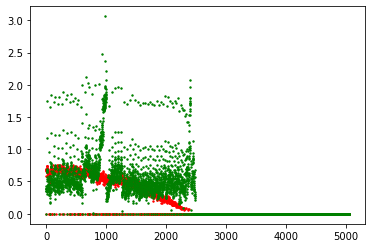

In [14]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index].shape[0]), Y_train[train_show_index], c='g', s = 2)

## X_test plot

In [15]:
X_test_results = model.predict(X_test)

In [16]:
test_show_index = 0

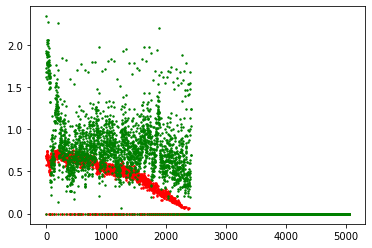

In [17]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index].shape[0]), Y_test[test_show_index], c='g', s = 2)

## Loss Decrease Plot

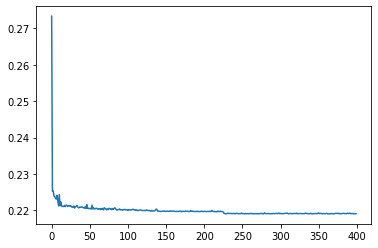

In [44]:
plt.plot(history.history['loss'])
plt.show()